In [1]:
# Linear Algebra
import numpy as np

# Data Preprocessing
import pandas as pd

# Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# Loading training and test dataset
train_df = pd.read_csv("/Users/shauryaluthra/Desktop/ML Projects/Datasets/Titanic Train.csv")
test_df = pd.read_csv("/Users/shauryaluthra/Desktop/ML Projects/Datasets/Titanic Test.csv")

In [3]:
train_df.info()
# The training-set has 891 examples and 11 features + the target variable (survived).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_df.describe()
# Below/ we can see that 38% out of the training-set survived the Titanic. 
# We can also see that the passenger ages range from 0.4 to 80.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(10) # Get first 10 rows in dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# From the table above, we can note a few things. 
# First of all, that we need to convert a lot of features into numeric ones later on, 
# so that the machine learning algorithms can process them. 
# Furthermore, we can see that the features have widely different ranges, 
# that we will need to convert into roughly the same scale. 
# We can also spot some more features, that contain missing values (NaN = not a number), 
# that wee need to deal with.

In [7]:
total = train_df.isnull().sum().sort_values(ascending = False)
print(total)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64


In [123]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [124]:
# The above result shows 549 didn't survive and 342 survived

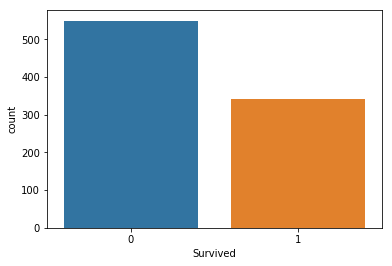

In [131]:
# Visualize the count of number of survivors 
sns.countplot(train_df['Survived'],label="Count")

In [129]:
# Survival rate by sex
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
0,0.188908
1,0.742038


In [130]:
# The above result shows 18% males survived and 74% females survived

In [132]:
# Survival rate by sex and class
train_df.pivot_table('Survived', index = 'Sex', columns = 'Pclass')

Pclass,1,2,3
Sex,,,
0,0.368852,0.157407,0.135447
1,0.968085,0.921053,0.500000


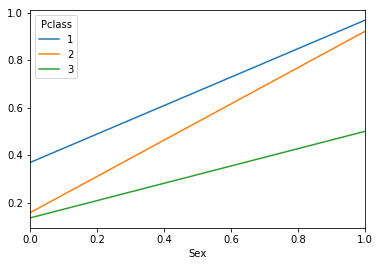

In [134]:
# Plot of survival rate by sex and class
train_df.pivot_table('Survived', index = 'Sex', columns = 'Pclass').plot()

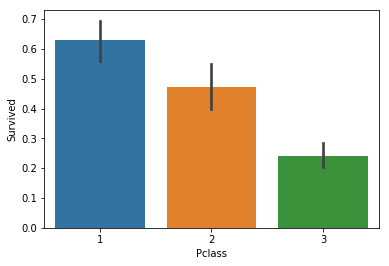

In [135]:
# Survival rate of each class.
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

In [136]:
# A little over 60% of the passengers in first class survived. Less than 30% of passengers in third class survived. 
# That means less than half of the passengers in third class survived, compared to the passengers in first class.

In [139]:
# Survival rate by sex, age and class
age = pd.cut(train_df['Age'], [0, 18, 80])
train_df.pivot_table('Survived', ['Age', age], 'Pclass')

,Pclass,1,2,3
Age,Age,,,
1,"(0, 18]",0.928571,0.428571,0.242424
2,"(0, 18]",0.550000,0.500000,0.226190
3,"(0, 18]",0.625000,0.371429,0.333333
4,"(0, 18]",0.642857,0.450000,0.225806
5,"(0, 18]",0.750000,0.419355,0.151515
6,"(0, 18]",0.512821,0.400000,0.104167


In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Text(0.5,1,'Male')

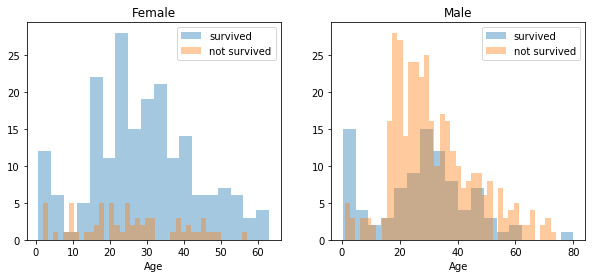

In [9]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(1, 2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde = False)
# By default, seaborn plots both kernel density estimation 
# and histogram, kde=False means you want to hide it and only display the histogram.
# Histograms represent the data distribution by form ing bins along the range of the data 
# and then drawing bars to show the num ber of observations that fall in each bin.
ax.legend()   # Key of a graph
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

# https://stackoverflow.com/questions/56707800/distplot-in-seaborn-in-python

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


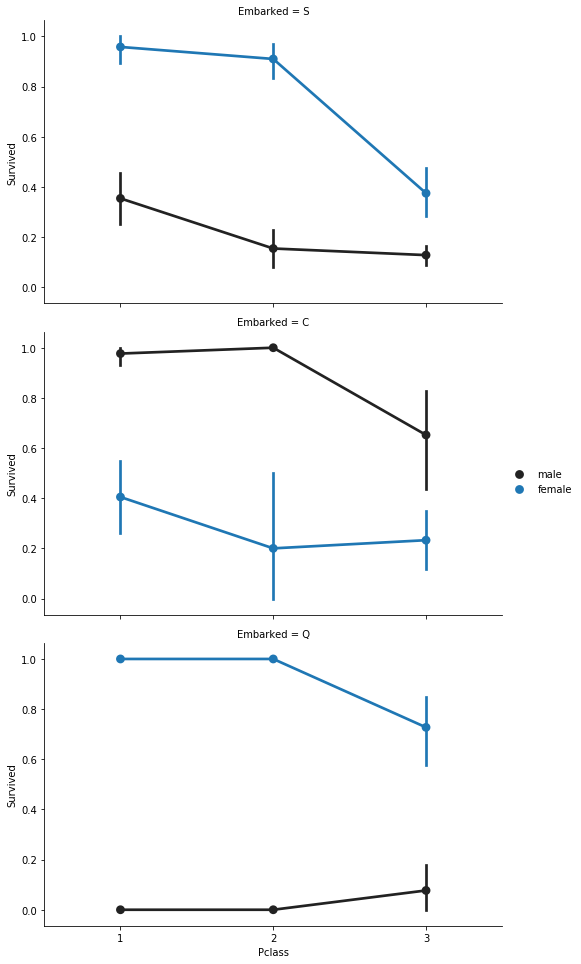

In [10]:
#FacetGrid object takes a dataframe as input and the names of the variables 
#that will form the row, column, or hue dimensions of the grid.
#The variables should be categorical and the data at each level of the variable will 
#be used for a facet along that axis.
FacetGrid = sns.FacetGrid(train_df, row = "Embarked", size = 4.5, aspect = 1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None) 
# palette, order, hue_order are optional parameters. if there value is None no need to write them also
FacetGrid.add_legend()  # Used for adding key to graph

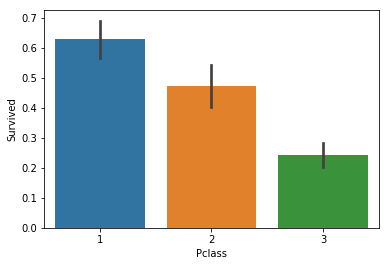

In [11]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_df)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


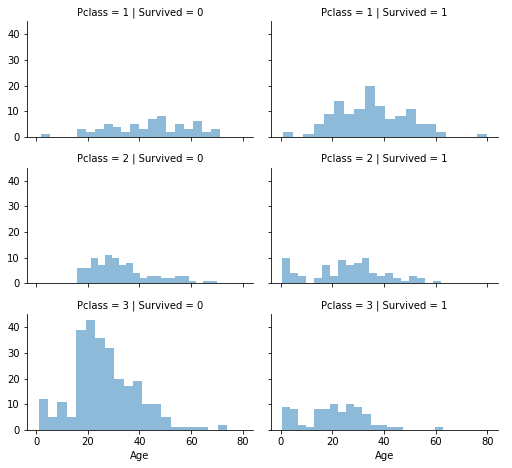

In [12]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20) # alpha changes colours of the bar. 
# alpha = 0 means white and alpha = 1 means dark blue. alpha is an optional parameter 
#and can be eliminated as well. By default value of alpha = 1
grid.add_legend()  # Used for adding key to graph

In [13]:
# Combining SibSp and Parch into one column as relatives
# loc gets rows (or columns) with particular labels from the index. 
# iloc gets rows (or columns) at particular positions in the index (so it only takes integers)
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0   # person is travelling with relatives and is not alone
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1  # person is alone
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()  
# The value_counts() function is used to get a Series containing counts of unique values.

1    537
0    354
Name: not_alone, dtype: int64

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


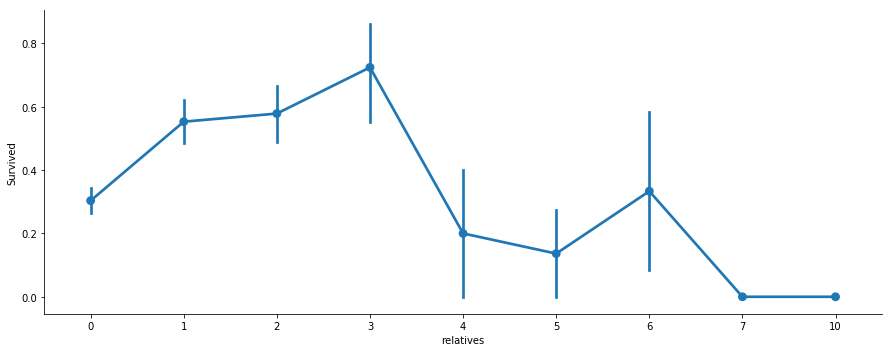

In [15]:
axes = sns.factorplot('relatives', 'Survived', data = train_df, aspect = 2.5)

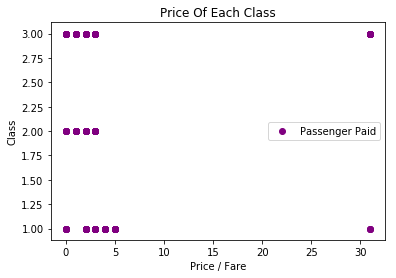

In [141]:
#Plot the Prices Paid Of Each Class
plt.scatter(train_df['Fare'], train_df['Pclass'],  color = 'purple', label='Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price Of Each Class')
plt.legend()
plt.show()

In [16]:
train_df = train_df.drop(['PassengerId'], axis = 1)
# A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows 
# and “axis 1” represents columns. By default value of axis is set to 0

In [17]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [18]:
train_df.Cabin.unique() # Used to get uniqie cabin

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
data = [train_df, test_df]
# fillna() function is used to fill out the missing values in the given series object. 
# A dictionary is used to pass the values to be filled corresponding to the different
# index labels in the series object.
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0") # Used to fill Null values of cabin by 0
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck) # map is used to replace values in a column with the 
    # values defined by dictionary created at line 2 
    dataset['Deck'] = dataset['Deck'].fillna(0)  # If cabin value isn't given then deck value is initialized as 0
    dataset['Deck'] = dataset['Deck'].astype(int)  # Converting values stored in cabin column to integer
# Dropping cabin from train and test
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [20]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0


In [21]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()  # Used to find mean values of age
    std = test_df["Age"].std()  # Used to find standard deviation of age
    is_null = dataset["Age"].isnull().sum() # No of null values in Age column
    rand_age = np.random.randint(mean - std, mean + std, size = is_null) # Computing random numbers using mean, standarn deviation. 
    # Size denotes number of random values that would be computed
    age_slice = dataset["Age"].copy() 
    age_slice[np.isnan(age_slice)] = rand_age # Fill null values of with random age values generated
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [22]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1,0


In [23]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
# Null values in Embarked column will be filled with the most common value
common_value = 'S'
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [26]:
# Converting float values to integer in Fare column
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)  # fillna(0) is used to fill null values with 0
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
train_df.info() # Clearly fare has been converted to integer values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null int64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: int64(9), object(4)
memory usage: 90.6+ KB


In [28]:
train_df.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [29]:
# Converting names to numeric
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    # If True, return DataFrame with one column per capture group. If False, return a 
    # Series/Index if there is one capture group or DataFrame if there are multiple capture groups.
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # replacing titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].map(titles) # map is used to replace values in a column with the 
    # values defined by dictionary created at line 2
    # converting titles into numbers
    dataset['Title'] = dataset['Title'].fillna(0)
    # filling null values with 0 in case any null value is present. This statement is for 
    # safety purpose only. This statement can also be removed as we have checked there are no null vales
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,0,1
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,0,2
3,1,1,female,35,1,0,113803,53,S,1,0,3,3
4,0,3,male,35,0,0,373450,8,S,0,1,0,1


In [31]:
# Converting sex to numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    dataset['Sex'] = dataset['Sex'].fillna(0)

In [32]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,A/5 21171,7,S,1,0,0,1
1,1,1,1,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7,S,0,1,0,2
3,1,1,1,35,1,0,113803,53,S,1,0,3,3
4,0,3,0,35,0,0,373450,8,S,0,1,0,1


In [33]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [34]:
# 681 unique values. It would be tricky to use this and hence we drop it
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,S,1,0,0,1
1,1,1,1,38,1,0,71,C,1,0,3,3
2,1,3,1,26,0,0,7,S,0,1,0,2
3,1,1,1,35,1,0,53,S,1,0,3,3
4,0,3,0,35,0,0,8,S,0,1,0,1


In [36]:
# Converting embarked to numeric
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,22,1,0,7,0,1,0,0,1
1,1,1,1,38,1,0,71,1,1,0,3,3
2,1,3,1,26,0,0,7,0,0,1,0,2
3,1,1,1,35,1,0,53,0,1,0,3,3
4,0,3,0,35,0,0,8,0,0,1,0,1


In [38]:
# Creating categories for Age column
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [39]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,0,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,0,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,0,1


In [40]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] < 31), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,0,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,0,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,0,1


In [42]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [43]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class
0,0,3,0,2,1,0,0,0,1,0,0,1,6
1,1,1,1,5,1,0,3,1,1,0,3,3,5
2,1,3,1,3,0,0,0,0,0,1,0,2,9
3,1,1,1,5,1,0,3,0,1,0,3,3,5
4,0,3,0,5,0,0,1,0,0,1,0,1,15


In [44]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [45]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,0,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,0,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,0,1,15,1
5,0,3,0,5,0,0,1,2,0,1,0,1,15,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,0,4,0,0
8,1,3,1,3,0,2,1,0,2,0,0,3,9,0
9,1,2,1,1,1,0,2,1,1,0,0,3,2,1


In [46]:
# The dataset is ready and now we'll apply machine learning models

In [47]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,0,2,0,1,0,1,6,0
1,893,3,1,5,1,0,0,0,1,0,0,3,15,0
2,894,2,0,3,0,0,1,2,0,1,0,1,6,1
3,895,3,0,5,0,0,1,0,0,1,0,1,15,1
4,896,3,1,5,1,1,1,0,2,0,0,3,15,0


In [48]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,0,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,0,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,0,1,15,1


In [49]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis = 1).copy()

In [50]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd.score(X_train, Y_train)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [51]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [52]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
# KNN(k nearest neighbours)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [54]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [55]:
# Perceptron
perceptron = Perceptron(max_iter = 5)
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [56]:
# Linear Support Vector Machine(SVM)
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Users/shauryaluthra/anaconda3/envs/tensorflow/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [58]:
# Now we'll see which is the best model from the above models
results = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Descent', 'Perceptron'], 'Score': [acc_sgd, acc_random_forest, acc_log, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_decision_tree]})
result_df = results.sort_values(by = 'Score', ascending = False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.59,KNN
92.59,Perceptron
86.31,Random Forest
82.15,Logistic Regression
81.71,Perceptron
81.37,Stochastic Gradient Descent
80.02,Naive Bayes
75.08,Support Vector Machines


In [59]:
# We'll now perofrm k folds cross validation on the highest predicting model which is KNN
# We observe KNN doesn't give good accuracy and try with Random Forest as shown. We have also
# used random forest as stated in below comment
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
scores = cross_val_score(rf, X_train, Y_train, cv = 10, scoring = "accuracy")
print("Scores:", scores)
print("Mean", scores.mean())
print("Standard deviation", scores.std())

('Scores:', array([0.76666667, 0.83333333, 0.74157303, 0.86516854, 0.84269663,
       0.84269663, 0.80898876, 0.7752809 , 0.84269663, 0.86363636]))
('Mean', 0.8182737487231868)
('Standard deviation', 0.04093164699967657)


In [60]:
# The average accuracy of model is 82% and has a standard deviation of 4%. This means accuracy
# of model can differ by +/- 4%

# The accuracy is still really good and since random forest is an easy to use model, 
# we will try to increase it’s performance even further in the following section.

# Random forest builds multiple decision trees and merges them together to get a more 
# accurate and stable prediction.

# One big advantage of random forest is, that it can be used for both classification 
# and regression problems, which form the majority of current machine learning systems.

# The random-forest algorithm brings extra randomness into the model, when it is growing the 
# trees. Instead of searching for the best feature while splitting a node, it searches for 
# the best feature among a random subset of features. This process creates a wide diversity, 
# which generally results in a better model.

# Another great quality of random forest is that they make it very easy to measure the relative 
# importance of each feature. Sklearn measure a features importance by looking at how much the 
# treee nodes, that use that feature, reduce impurity on average (across all trees in the 
# forest). It computes this score automaticall for each feature after training and scales the 
# results so that the sum of all importances is equal to 1 as shown below

In [61]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.219
Sex,0.162
Age_Class,0.094
Deck,0.084
Age,0.076
Pclass,0.072
Fare,0.066
Embarked,0.054
relatives,0.054


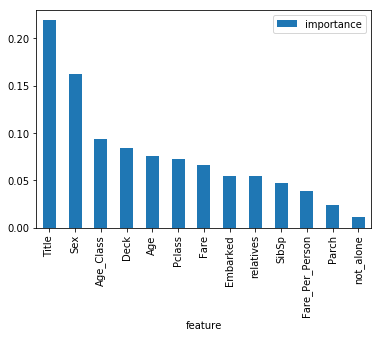

In [62]:
importances.plot.bar()

In [63]:
# not_alone and Parch doesn’t play a significant role in our random forest classifiers prediction 
# process. Because of that I will drop them from the dataset and train the classifier again. 
# We could also remove more or less features, but this would need a more detailed investigation
# of the features effect on our model. But I think it’s just fine to remove only Alone and Parch.

In [64]:
# Dropping not_alone column
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

# Dropping parch column
train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [66]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,1,0,1,6,0
1,1,1,1,5,1,3,1,1,3,3,5,1
2,1,3,1,3,0,0,0,0,0,2,9,0
3,1,1,1,5,1,3,0,1,3,3,5,1
4,0,3,0,5,0,1,0,0,0,1,15,1


In [67]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest, 2,),"%")

(92.59, '%')


In [68]:
# Our random forest model predicts better as it did before. A general rule is that, the more
# features you have, the more likely your model will suffer from overfitting and vice versa.
# But our data looks fine for now and hasn't too much features.

# There is also another way to evaluate a random-forest classifier, which is probably much more
# accurate than the score we used before. What I am talking about is the out-of-bag samples to
# estimate the generalization accuracy. I will not go into details here about how it works. 
# Just note that out-of-bag estimate is as accurate as using a test set of the same size as 
# the training set. Therefore, using the out-of-bag error estimate removes the need for a set 
# aside test set.

In [69]:
print("oob score", round(random_forest.oob_score_,4)*100, "%")

('oob score', 80.92, '%')


In [70]:
# Now we can start tuning the hyperameters of random forest.

In [73]:
# Hypermeter tuning takes a lot of time 
param_grid = {"criterion": ["gini", "entropy"], "min_samples_leaf": [1, 5, 10, 25, 50, 70], "min_samples_split": [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators = 100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
clf = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs = -1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [74]:
# Test new parameters
# Random forest
random_forest = RandomForestClassifier(criterion = "gini", min_samples_leaf = 1, min_samples_split = 10, n_estimators = 100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
random_forest.fit(X_train, Y_train)
print("oob score:", round(random_forest.oob_score_, 4) * 100, "%")

('oob score:', 82.49, '%')


In [75]:
# It is more complicated to evaluate a classification model than regression model and hence we'll perform further evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv = 3)
confusion_matrix(Y_train, predictions)

array([[492,  57],
       [ 92, 250]])

In [ ]:
# The first row is about  the not-survived-predictions: 492 passengers were correctly classified as not survived (called
# true negatives) and 57 where wrongly classified as not survived (false positives).

# The second row is about the survived-predictions: 92 passengers where wrongly classified as survived (false negatives) 
# and 2250 where correctly classified as survived (true positives).

# A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even 
# more, like computing the classifiers precision.

In [76]:
# Precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(Y_train, predictions))
print("Recall:", recall_score(Y_train, predictions))
# Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it 
# predicted the survival of 73 % of the people who actually survived.

('Precision:', 0.8143322475570033)
('Recall:', 0.7309941520467836)


In [77]:
# Fscore

# You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the
# harmonic mean of precision and recall.

from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

# There we have it, a 77 % F-score. The score is not that high, because we have a recall of 73%. But unfortunately the
# F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, 
# because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision,
# sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the 
# precision/recall tradeoff as shown below

0.7704160246533128

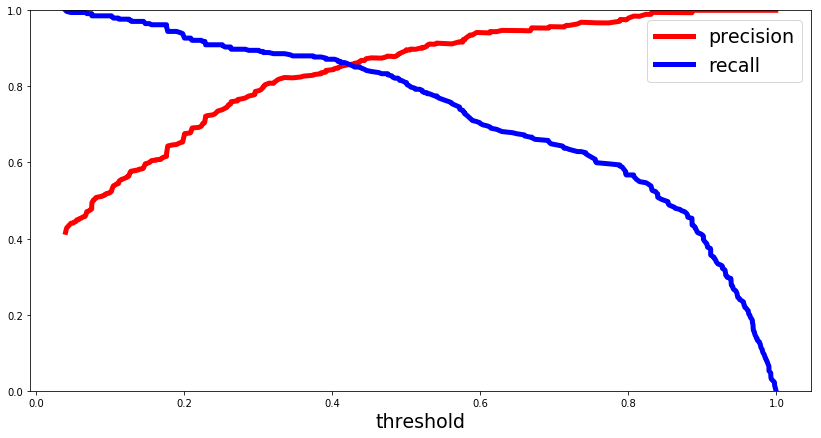

In [80]:
# Precision recall curve

# For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it 
# classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score 
# is smaller than the threshold). That’s why the threshold plays an important part.

# Precision and recall with the threshold is plotted using matplotlib

from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]
precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [81]:
# Above one can clearly see that the recall is falling of rapidly at a precision of around 85%. Because of that you 
# may want to select the precision/recall tradeoff before that — maybe at around 75 %.

# You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current 
# machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and 
# see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and 
# would get the desired accuracy.

# Another way is to plot the precision and recall against each other:

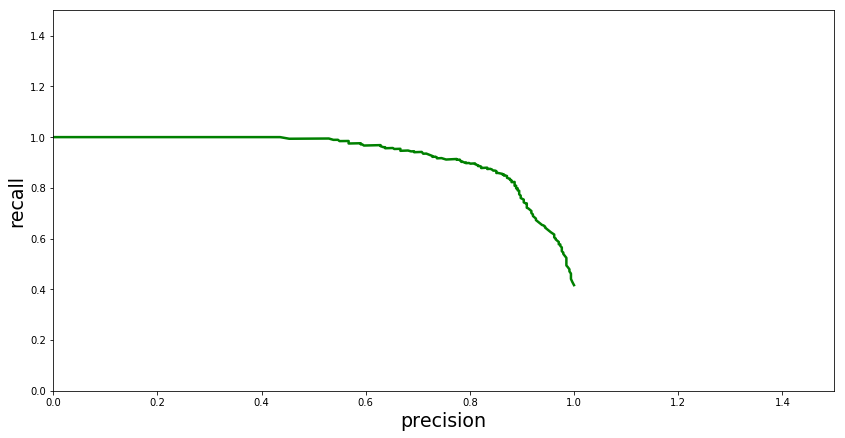

In [82]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g-", linewidth = 2.5)
    plt.xlabel("precision", fontsize = 19)
    plt.ylabel("recall", fontsize = 19)
    plt.axis([0, 1.5, 0, 1.5])
plt.figure(figsize = (14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

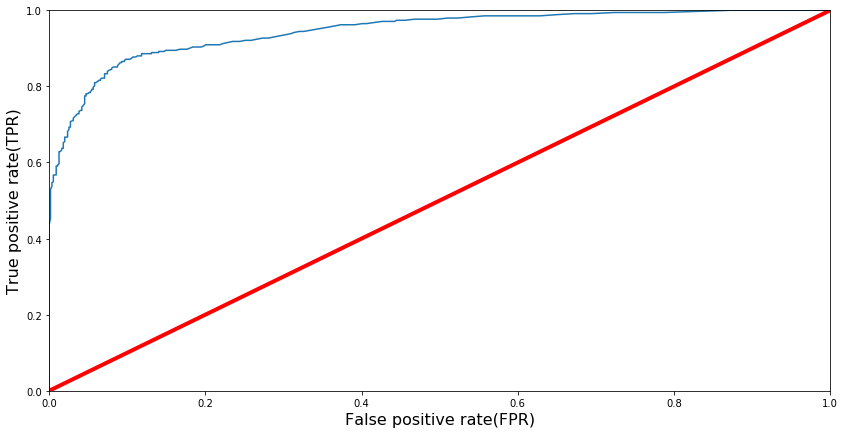

In [83]:
# ROC AUC Curve

# Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the 
# true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative 
# instances), instead of plotting the precision versus the recall.

from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, label = None)
    plt.plot([0, 1], [0, 1], 'r', linewidth = 4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False positive rate(FPR)", fontsize = 16)
    plt.ylabel("True positive rate(TPR)", fontsize = 16)
plt.figure(figsize = (14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [84]:
# The red line in the middle represents a purely random classifier (e.g a coin flip) and therefore your classifier 
# should be as far away from it as possible. Our Random Forest model seems to do a good job.

# Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true
# positive rate is.

In [85]:
# ROC AUC Score

# The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under
# the curve, which is called AUC.

# A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have 
# a score of 0.5.

from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-score:", r_a_score)

('ROC-AUC-score:', 0.9450090009480288)


In [115]:
# Print Prediction of Random Forest Classifier model
pred = random_forest.predict(X_test)
print(pred)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 1]


In [166]:
# This has been done on X_Test. The number of entries made in my_survival must match the number of columns in X_test
my_survival = [[2, 0, 28, 0, 0, 14, 1, 0, 1, 2, 2, 6, 14]]
# Print Prediction of Random Forest Classifier model
pred = random_forest.predict(my_survival)
print(pred)
if pred == 0:
    print("Oh no! You didn't make it")
else:
    print('Nice! You survived')
Y_prediction = random_forest.predict(X_test)

[1]
Nice! You survived


In [122]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,3,0,2,0,0,0,2,0,1,0,1,6,0
1,3,1,5,1,0,0,0,1,0,0,3,15,0
2,2,0,3,0,0,1,2,0,1,0,1,6,1
3,3,0,5,0,0,1,0,0,1,0,1,15,1
4,3,1,5,1,1,1,0,2,0,0,3,15,0


In [143]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title,Age_Class,Fare_Per_Person
0,892,3,0,2,0,0,2,0,0,1,6,0
1,893,3,1,5,1,0,0,1,0,3,15,0
2,894,2,0,3,0,1,2,0,0,1,6,1
3,895,3,0,5,0,1,0,0,0,1,15,1
4,896,3,1,5,1,1,0,2,0,3,15,0


In [150]:
len(predictions)

891

In [152]:
predictions = cross_val_predict(random_forest, X_test, Y_pred, cv = 3)

In [154]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [155]:
submission = pd.DataFrame({'PassengerId':test_df['PassengerId'],'Survived':predictions})

In [158]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [159]:
filename = 'Titanic Predictions.csv'
submission.to_csv(filename, index = False)